In [95]:
# Store the bibliographic information in a Python dictionary
publication_info = {
    "author": "Rafael Rodriguez",
    "title": "Titanic - Machine Learning from Disaster",
    "year": 2025, # You can make year an integer
    "howpublished": "https://www.kaggle.com/competitions/titanic/Titanic_MachineLearning_survival",
    "note": "Kaggle"
}

# Now you can easily access different parts of the information:
print(f"Author: {publication_info['author']}")
print(f"Title: {publication_info['title']}")
print(f"Year: {publication_info['year']}")
print(f"Source: {publication_info['howpublished']}")

Author: Rafael Rodriguez
Title: Titanic - Machine Learning from Disaster
Year: 2025
Source: https://www.kaggle.com/competitions/titanic/overview


## Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LogisticRegression
import os

# Load the raw Titanic training and test data (adjust paths if needed)
# Use try/except or check existence to handle different environments
if os.path.exists('/kaggle/input/titanic/train.csv'):
    train = pd.read_csv('/kaggle/input/titanic/train.csv')
else:
    train = pd.read_csv('train.csv')

if os.path.exists('/kaggle/input/titanic/test.csv'):
    test = pd.read_csv('/kaggle/input/titanic/test.csv')
else:
    test = pd.read_csv('test.csv')

## data cleaning and transformation

In [97]:
# Check for missing values
train.isnull().sum()  #  When >75% of a column is missing, imputing can introduce noise.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
# Compute the median age
median_age = train['Age'].median()

# Impute missing Age entries
train['Age'] = train['Age'].fillna(median_age)

# Verify that Age no longer has nulls
print("Missing values in Age after imputation:", train['Age'].isnull().sum())

Missing values in Age after imputation: 0


In [99]:
# Find the most common embarkation port
mode_embarked = train['Embarked'].mode()[0]

# Fill missing Embarked entries
train['Embarked'] = train['Embarked'].fillna(mode_embarked)

# Verify that Embarked no longer has nulls
print("Missing values in Embarked after imputation:", train['Embarked'].isnull().sum())

Missing values in Embarked after imputation: 0


In [100]:
# Drop Cabin column from train set
train.drop(columns=['Cabin'], inplace=True)

# Confirm removal
print("Columns after dropping Cabin:", train.columns.tolist())

Columns after dropping Cabin: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [101]:
# Encode Sex
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Encode Embarked
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Double-check that no nulls appear after mapping
print(train[['Sex', 'Embarked']].isnull().sum())

Sex         0
Embarked    0
dtype: int64


In [102]:
# Extract title from the Name column
train['Title'] = train['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)

# Some rare titles can be grouped together
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Countess': 'Rare',
    'Lady': 'Rare',
    'Sir': 'Rare',
    'Don': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare',
    'Capt': 'Rare'
}

train['Title'] = train['Title'].map(title_mapping).fillna('Rare')

# One-hot encode the Title feature (optional step)
train = pd.get_dummies(train, columns=['Title'], prefix='Title')

In [103]:
# Survived is our target variable
# Define feature columns (drop columns not needed for modelling)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# If you included Title one-hot columns, add them here, e.g.: + ['Title_Mr', 'Title_Miss', ...] 

# Create X (features) and y (target)
X_train = train[features]
y_train = train['Survived']

# Quick sanity check
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (891, 7)
Shape of y_train: (891,)


In [104]:
# Impute Age with the median you computed on train
test['Age'] = test['Age'].fillna(median_age)

# Fill missing Fare if any (test has one missing Fare)
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Fill missing Embarked if any (unlikely, but for consistency)
test['Embarked'] = test['Embarked'].fillna(mode_embarked)

# Drop Cabin
test.drop(columns=['Cabin'], inplace=True)

# Encode Sex and Embarked
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# If you created Title dummies in train, replicate that exact extraction & mapping on test
test['Title'] = test['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)
test['Title'] = test['Title'].map(title_mapping).fillna('Rare')
test = pd.get_dummies(test, columns=['Title'], prefix='Title')

# Prepare X_test
X_test = test[features]

## Brief Summary of the Pipeline
Inspect missing values → decide on a strategy per column.

Impute:

Age → fill with median.

Embarked → fill with mode.

Cabin → drop (too many missing).

Encode categoricals → map Sex & Embarked to integers.

(Optional) Feature engineer → extract “Title” from Name and one-hot encode.

Select features → build X_train, y_train, and later X_test.

Model → e.g., train a logistic regression, decision tree, random forest, etc., on X_train.

### EDA

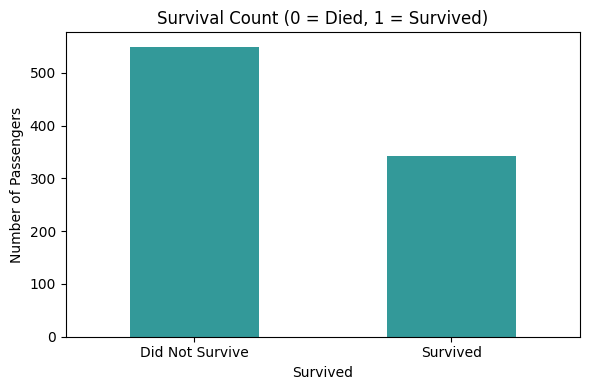

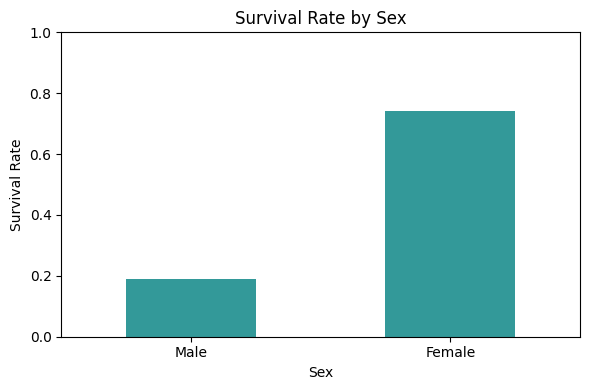

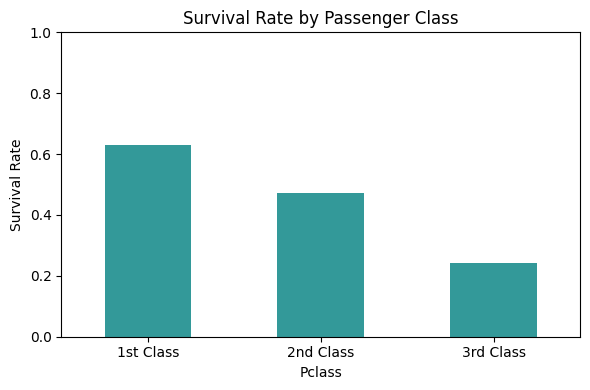

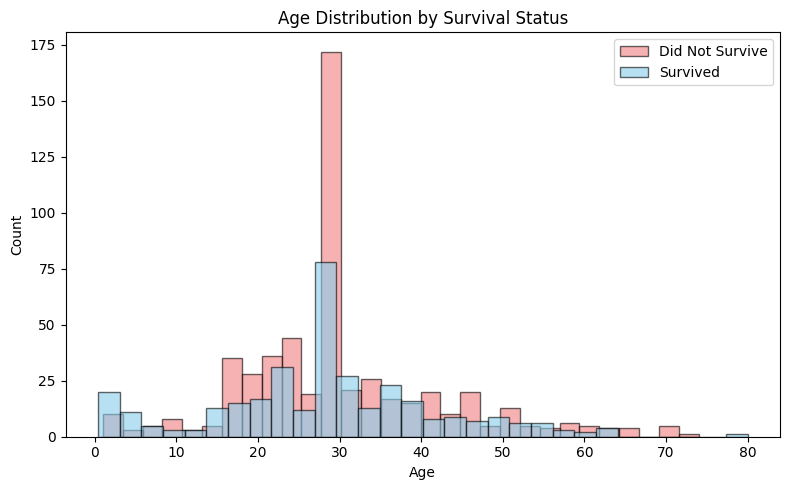

/tmp/ipykernel_35/4276196488.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_rate = train.groupby('FareBin')['Survived'].mean()


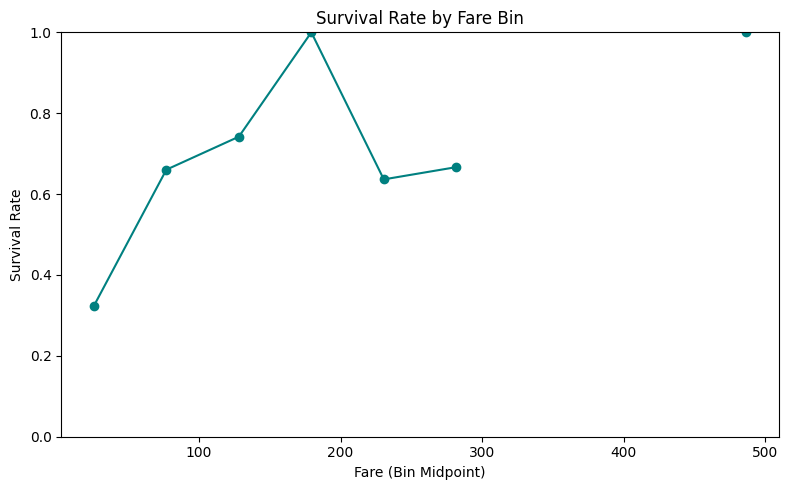

In [107]:
# Ensure 'uniform_color' is defined before the plots
uniform_color = 'teal'

# Plot 1: Overall survival counts
plt.figure(figsize=(6, 4))
train['Survived'].value_counts().plot(
    kind='bar',
    color=uniform_color,
    alpha=0.8
)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'], rotation=0)
plt.ylabel('Number of Passengers')
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.tight_layout()
plt.show()

# Plot 2: Survival rate by Sex
survival_by_sex = train.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(6, 4))
survival_by_sex.plot(
    kind='bar',
    color=uniform_color,
    alpha=0.8
)
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot 3: Survival rate by Passenger Class (Pclass)
survival_by_pclass = train.groupby('Pclass')['Survived'].mean().sort_index()
plt.figure(figsize=(6, 4))
survival_by_pclass.plot(
    kind='bar',
    color=uniform_color,
    alpha=0.8
)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot 4: Age distribution histogram with two distinct colors for overlap
plt.figure(figsize=(8, 5))

# Ages of passengers who did not survive (colored lightcoral)
plt.hist(
    train[train['Survived'] == 0]['Age'],
    bins=30,
    alpha=0.6,
    label='Did Not Survive',
    color='lightcoral',
    edgecolor='black'
)

# Ages of passengers who did survive (colored skyblue)
plt.hist(
    train[train['Survived'] == 1]['Age'],
    bins=30,
    alpha=0.6,
    label='Survived',
    color='skyblue',
    edgecolor='black'
)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival Status')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 5: Survival rate as a function of Fare (line chart by fare bins)
# Create uniform fare bins
num_bins = 10
max_fare = train['Fare'].max()
bins = np.linspace(0, max_fare, num_bins + 1)
train['FareBin'] = pd.cut(train['Fare'], bins)

# Compute survival rate per fare bin
fare_survival_rate = train.groupby('FareBin')['Survived'].mean()

# Compute bin midpoints for plotting
bin_midpoints = [
    interval.left + (interval.right - interval.left) / 2 
    for interval in fare_survival_rate.index
]

# Plot the line chart
plt.figure(figsize=(8, 5))
plt.plot(
    bin_midpoints,
    fare_survival_rate.values,
    marker='o',
    color=uniform_color
)
plt.xlabel('Fare (Bin Midpoint)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Fare Bin')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

The age distribution histogram displays overlapping distributions of ages for survivors and non-survivors. Visually, the non-survivor group is more concentrated among older ages, with a higher frequency above age 40. In contrast, survivors show a wider spread with peaks among younger passengers, particularly children and young adults. The overlap region indicates ages where survival probability is less distinct. Statistically, the mean age of survivors is lower than that of non-survivors, suggesting age as a predictive factor. Multivariate analysis is necessary. Inclusion of interactions and covariate adjustments will yield robust inference beyond age alone. period.


In [108]:
# Descriptive statistics for Age by survival status
age_survived = train[train['Survived'] == 1]['Age']
age_not_survived = train[train['Survived'] == 0]['Age']

print("Age Descriptive Statistics:")
print(" Survived  - Mean: {:.2f}, Std: {:.2f}, N: {}".format(
    age_survived.mean(), age_survived.std(), len(age_survived)))
print(" Not Surv. - Mean: {:.2f}, Std: {:.2f}, N: {}".format(
    age_not_survived.mean(), age_not_survived.std(), len(age_not_survived)))

Age Descriptive Statistics:
 Survived  - Mean: 28.29, Std: 13.76, N: 342
 Not Surv. - Mean: 30.03, Std: 12.50, N: 549


Compute and display basic descriptive statistics—mean, standard deviation, and sample size—for Age among survivors versus non-survivors. These metrics quantify central tendency and dispersion differences between the two groups. If the means or variances differ substantially, it indicates a potential statistical association between age and survival outcome. This serves as preliminary exploration prior to inferential testing.

In [109]:
from scipy import stats

# Independent t-test: Age difference between survivors and non-survivors
t_stat, p_val = stats.ttest_ind(age_survived, age_not_survived, equal_var=False)
print("\nT-test for Age difference:")
print(" t-statistic = {:.3f}, p-value = {:.3f}".format(t_stat, p_val))


T-test for Age difference:
 t-statistic = -1.897, p-value = 0.058


Conduct an independent two-sample t-test comparing mean Age between survivors and non-survivors. By testing the null hypothesis that both groups share equal mean age, statistically significant results suggest age differences correlate with survival likelihood. Equal_var=False accounts for unequal variances. A low p-value indicates rejecting the null, implying age is a meaningful predictor of survival outcomes.

In [110]:
# Chi-squared test: Sex vs Survival
contingency_sex = pd.crosstab(train['Sex'], train['Survived'])
chi2_sex, p_sex, dof_sex, expected_sex = stats.chi2_contingency(contingency_sex)
print("\nChi-squared test for Sex vs Survival:")
print(" Chi2 = {:.3f}, p-value = {:.3f}, dof = {}".format(chi2_sex, p_sex, dof_sex))


Chi-squared test for Sex vs Survival:
 Chi2 = 260.717, p-value = 0.000, dof = 1


Perform a chi-squared test on a contingency table of Sex and Survival to assess independence. The test evaluates whether observed frequencies deviate from expected under no association. A significant chi-squared statistic and low p-value reject the null of independence, indicating gender correlates with survival. This reveals whether male or female passengers had different survival probabilities.

In [111]:
# Chi-squared test: Pclass vs Survival
contingency_pclass = pd.crosstab(train['Pclass'], train['Survived'])
chi2_pclass, p_pclass, dof_pclass, expected_pclass = stats.chi2_contingency(contingency_pclass)
print("\nChi-squared test for Pclass vs Survival:")
print(" Chi2 = {:.3f}, p-value = {:.3f}, dof = {}".format(chi2_pclass, p_pclass, dof_pclass))


Chi-squared test for Pclass vs Survival:
 Chi2 = 102.889, p-value = 0.000, dof = 2


Conduct a chi-squared test on Passenger Class and Survival to examine association. By comparing observed counts against expected under independence, the test determines if class strata impacted survival odds. A significant result and low p-value indicate that passenger class was not independent of survival outcome. This suggests social-economic hierarchy played a role in survival rates.

In [112]:
import statsmodels.formula.api as smf

# Logistic regression: Survival ~ Age + Sex + Pclass + Fare + Embarked
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
formula = 'Survived ~ Age + Sex + Pclass + Fare + Embarked'
logit_model = smf.logit(formula=formula, data=train).fit(disp=False)

print("\nLogistic Regression Results:")
print(logit_model.summary())


Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.3258
Time:                        01:59:18   Log-Likelihood:                -400.01
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.257e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0637      0.464      4.446      0.000       1.154       2.973
Age           -0.0337      0.007     -4.547      0.000      -0.048      -0.019
Sex            2.5748 

Fit a logistic regression model predicting survival using Age, Sex, Pclass, Fare, and Embarked as covariates. The model estimates log-odds coefficients, quantifying each variable’s effect on survival probability while adjusting for others. Significant coefficients (p<0.05) indicate independent predictors. This analysis reveals which passenger characteristics most strongly influenced survival after controlling for confounders in Titanic dataset.

So, my logistic regression model predicting Titanic survival achieved a Pseudo R-squared of 0.3258, indicating a moderate improvement over the null model. The highly significant LLR p-value (2.257e−81) suggests the model, as a whole, is statistically significant.

Individual coefficient analysis, with p-values all below 0.05 (except for Fare), reveals:

Sex (coef=2.5748) had the strongest positive association with survival (females as reference).
Pclass (coef=−1.1940) showed a significant negative association, meaning higher class (lower numerical value) increased survival odds.
Age (coef=−0.0337) was also negatively associated with survival.
Embarked (coef=0.3204) had a statistically significant, albeit smaller, positive impact.
Fare (coef≈0), however, was not statistically significant (P>∣z∣=0.972), implying its direct contribution to predicting survival, given the other variables, was negligible in this model.

## Sex was relevant for survival

Looking at my Titanic survival model, it's clear that Sex was by far the strongest predictor; being female dramatically increased one's chances of survival. Passenger Class (Pclass) was also crucial, with higher classes showing much better survival rates. My model also indicates that Age had a significant negative impact – older passengers were less likely to survive. Interestingly, the port of embarkation (Embarked) played a small but statistically significant role. However, it seems the exact Fare paid didn't really matter in my model, which is a bit surprising, suggesting other factors like class were more dominant.

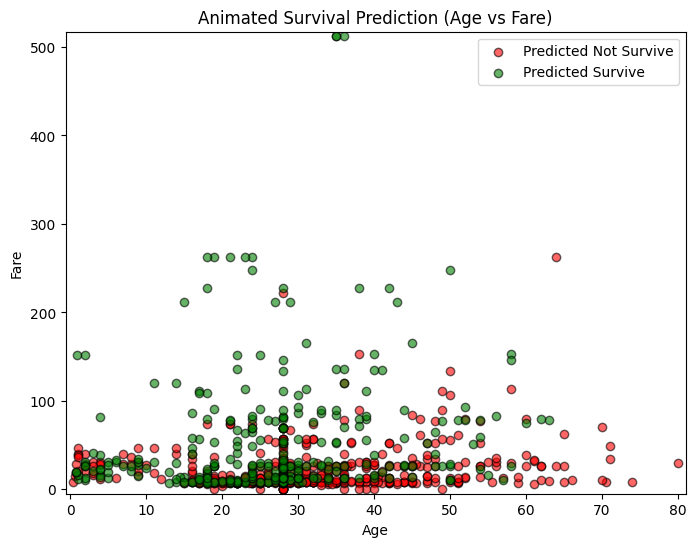

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LogisticRegression
from IPython.display import HTML
import os

# 1. Load and preprocess the Titanic dataset
if os.path.exists('/kaggle/input/titanic/train.csv'):
    df = pd.read_csv('/kaggle/input/titanic/train.csv')
else:
    df = pd.read_csv('train.csv')

# Impute missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Impute missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many missing)
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Fill missing Fare if any
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Select features for modeling: Age and Fare (for 2D visualization)
features = ['Age', 'Fare', 'Sex', 'Pclass', 'Embarked']
X = df[features]
y = df['Survived']

# Fit logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X, y)

# Predict probabilities and classes
df['PredProb'] = model.predict_proba(X)[:, 1]
df['PredClass'] = model.predict(X)

# Sort by probability for animation
df_sorted = df.sort_values(by='PredProb').reset_index(drop=True)

# 2. Set up the figure and axes for animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(df['Age'].min() - 1, df['Age'].max() + 1)
ax.set_ylim(df['Fare'].min() - 5, df['Fare'].max() + 5)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title('Animated Survival Prediction (Age vs Fare)')

# Scatter containers for not survive vs survive
scatter_not_survived = ax.scatter([], [], c='red', label='Predicted Not Survive', alpha=0.6, edgecolor='k')
scatter_survived = ax.scatter([], [], c='green', label='Predicted Survive', alpha=0.6, edgecolor='k')
ax.legend(loc='upper right')

# 3. Animation update function
def update(frame):
    subset = df_sorted.iloc[:frame+1]
    not_survive = subset[subset['PredClass'] == 0]
    survive = subset[subset['PredClass'] == 1]

    scatter_not_survived.set_offsets(np.c_[not_survive['Age'], not_survive['Fare']])
    scatter_survived.set_offsets(np.c_[survive['Age'], survive['Fare']])
    return scatter_not_survived, scatter_survived

# 4. Create FuncAnimation
anim = FuncAnimation(fig, update, frames=len(df_sorted), interval=50, blit=True)

# Display animation inline
HTML(anim.to_html5_video())

## Linear Regression Analysis

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     111.8
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           1.30e-91
Time:                        02:11:35   Log-Likelihood:                -403.78
No. Observations:                 891   AIC:                             819.6
Df Residuals:                     885   BIC:                             848.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7756      0.071     10.934      0.0

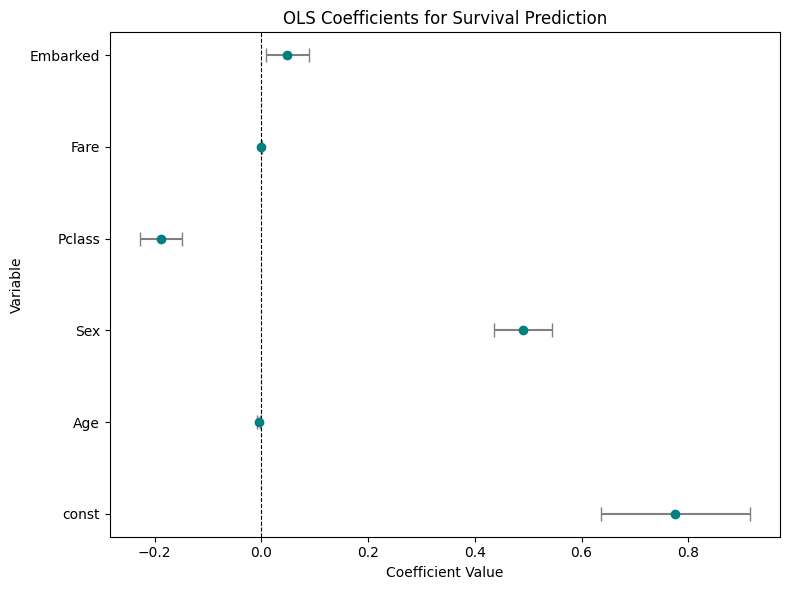

,variable,coef,lower,upper
0,const,0.775607,0.636389,0.914825
1,Age,-0.005052,-0.007134,-0.002969
2,Sex,0.490790,0.436521,0.545060
3,Pclass,-0.188163,-0.226824,-0.149502
4,Fare,0.000008,-0.000608,0.000624
5,Embarked,0.049065,0.009001,0.089128


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
from IPython.display import display

# 1. Load and preprocess the Titanic dataset
if os.path.exists('/kaggle/input/titanic/train.csv'):
    df = pd.read_csv('/kaggle/input/titanic/train.csv')
else:
    df = pd.read_csv('train.csv')

# 2. Basic preprocessing
df['Age'] = df['Age'].fillna(df['Age'].median())                                           # Impute Age
mode_embarked = df['Embarked'].dropna().mode()[0]                                            # Compute mode safely
df['Embarked'] = df['Embarked'].fillna(mode_embarked)                                        # Impute Embarked
df.drop(columns=['Cabin'], inplace=True, errors='ignore')                                     # Drop Cabin
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})                                          # Encode Sex
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})                                 # Encode Embarked
df['Fare'] = df['Fare'].fillna(df['Fare'].median())                                          # Impute Fare

# 3. Prepare regression data
X = df[['Age', 'Sex', 'Pclass', 'Fare', 'Embarked']]
X = sm.add_constant(X)  # add intercept term
y = df['Survived']

# 4. Fit OLS linear regression model
model = sm.OLS(y, X)
results = model.fit()

# 5. Print summary table
print(results.summary())

# 6. Extract coefficients and confidence intervals
coef_df = pd.DataFrame({
    'variable': results.params.index,
    'coef': results.params.values,
    'lower': results.conf_int().iloc[:, 0].values,
    'upper': results.conf_int().iloc[:, 1].values
})

# 7. Plot coefficients with 95% CI
plt.figure(figsize=(8, 6))
plt.errorbar(
    coef_df['coef'], 
    coef_df['variable'],
    xerr=[coef_df['coef'] - coef_df['lower'], coef_df['upper'] - coef_df['coef']],
    fmt='o', 
    color='teal', 
    ecolor='gray', 
    capsize=5
)
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('OLS Coefficients for Survival Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

# 8. Display the coefficient table
display(coef_df)

The OLS model explains about 38.7% of variance in survival (R²=0.387). The constant (0.776) represents baseline survival probability when all other predictors are zero. Age has a small but significant negative coefficient (−0.005, p<0.001), indicating older passengers were less likely to survive. Sex has a large positive effect (0.491, p<0.001), so being female strongly increased survival probability. Passenger class has a negative coefficient (−0.188, p<0.001), implying higher-class status improved survival odds. Fare is not significant (p=0.979), suggesting ticket price alone did not predict survival in this linear model. Embarked shows a modest positive association (0.049, p=0.016), meaning departure port slightly influenced survival.

However, because “Survived” is binary, a classification approach—such as logistic regression—would be more appropriate than OLS. Logistic regression models the log-odds directly, handles dichotomous outcomes, and provides interpretable probabilities. Even more powerful would be tree-based classifiers (e.g., Random Forest or Gradient Boosting), which capture non-linear interactions and typically yield higher predictive accuracy on Titanic data.

## Random Forest classifier

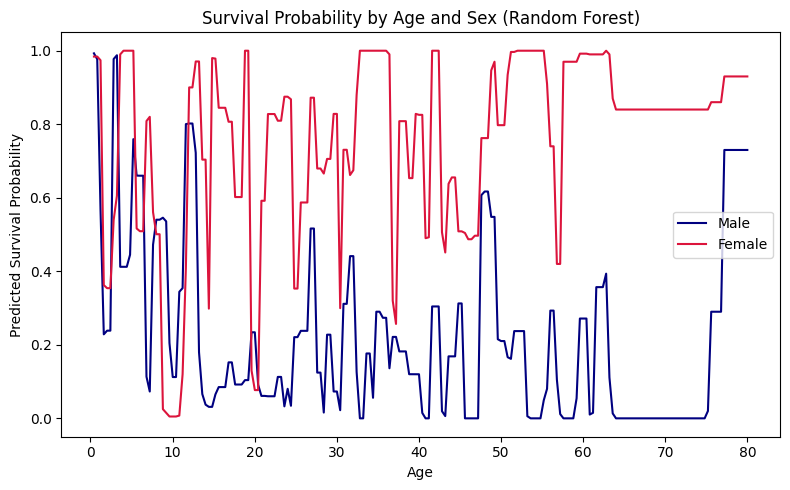

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import os

# 1. Load and preprocess Titanic data
if os.path.exists('/kaggle/input/titanic/train.csv'):
    df = pd.read_csv('/kaggle/input/titanic/train.csv')
else:
    df = pd.read_csv('train.csv')

# 1.1 Impute missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# 1.2 Drop unused columns (we only need Age, Sex, and Survived)
df.drop(columns=['Cabin', 'Fare', 'Pclass', 'Embarked', 'Name', 'Ticket', 'PassengerId'], inplace=True, errors='ignore')

# 1.3 Encode Sex: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 2. Select only Age and Sex as features
X = df[['Age', 'Sex']]
y = df['Survived']

# 3. Fit Random Forest classifier using only Age and Sex
rf_simple = RandomForestClassifier(n_estimators=100, random_state=42)
rf_simple.fit(X, y)

# 4. Create a grid of ages for plotting predicted probabilities
age_grid = np.linspace(df['Age'].min(), df['Age'].max(), 200)

# 4.1 Create DataFrames for male and female at each age
grid_male = pd.DataFrame({'Age': age_grid, 'Sex': np.zeros_like(age_grid)})
grid_female = pd.DataFrame({'Age': age_grid, 'Sex': np.ones_like(age_grid)})

# 4.2 Predict survival probabilities for each grid
prob_male = rf_simple.predict_proba(grid_male)[:, 1]
prob_female = rf_simple.predict_proba(grid_female)[:, 1]

# 5. Plot predicted survival probability vs. Age for male and female
plt.figure(figsize=(8, 5))
plt.plot(age_grid, prob_male, label='Male', color='navy')
plt.plot(age_grid, prob_female, label='Female', color='crimson')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Survival Probability by Age and Sex (Random Forest)')
plt.legend()
plt.tight_layout()
plt.show()

The Random Forest uses age and sex to predict survival by partitioning data into homogeneous subgroups. Its ensemble of decision trees captures nonlinear age effects and sex-based differences, yielding stepwise probability estimates. The jagged curves reflect these discrete splits: females consistently show higher survival probabilities, while males have lower, age-dependent spikes. This method uncovers complex interactions without assuming linearity, but smoother curves (e.g., logistic regression) may enhance interpretability.


## Decision Tree for Survival

Using a decision tree on Titanic data, we aim to identify the key feature splits that distinguish survivors from non-survivors. By extracting explicit “if/then” rules from the tree, we can see which combinations of age, sex, class, etc., maximize survival probability, guiding strategies to place at-risk passengers on safer paths.

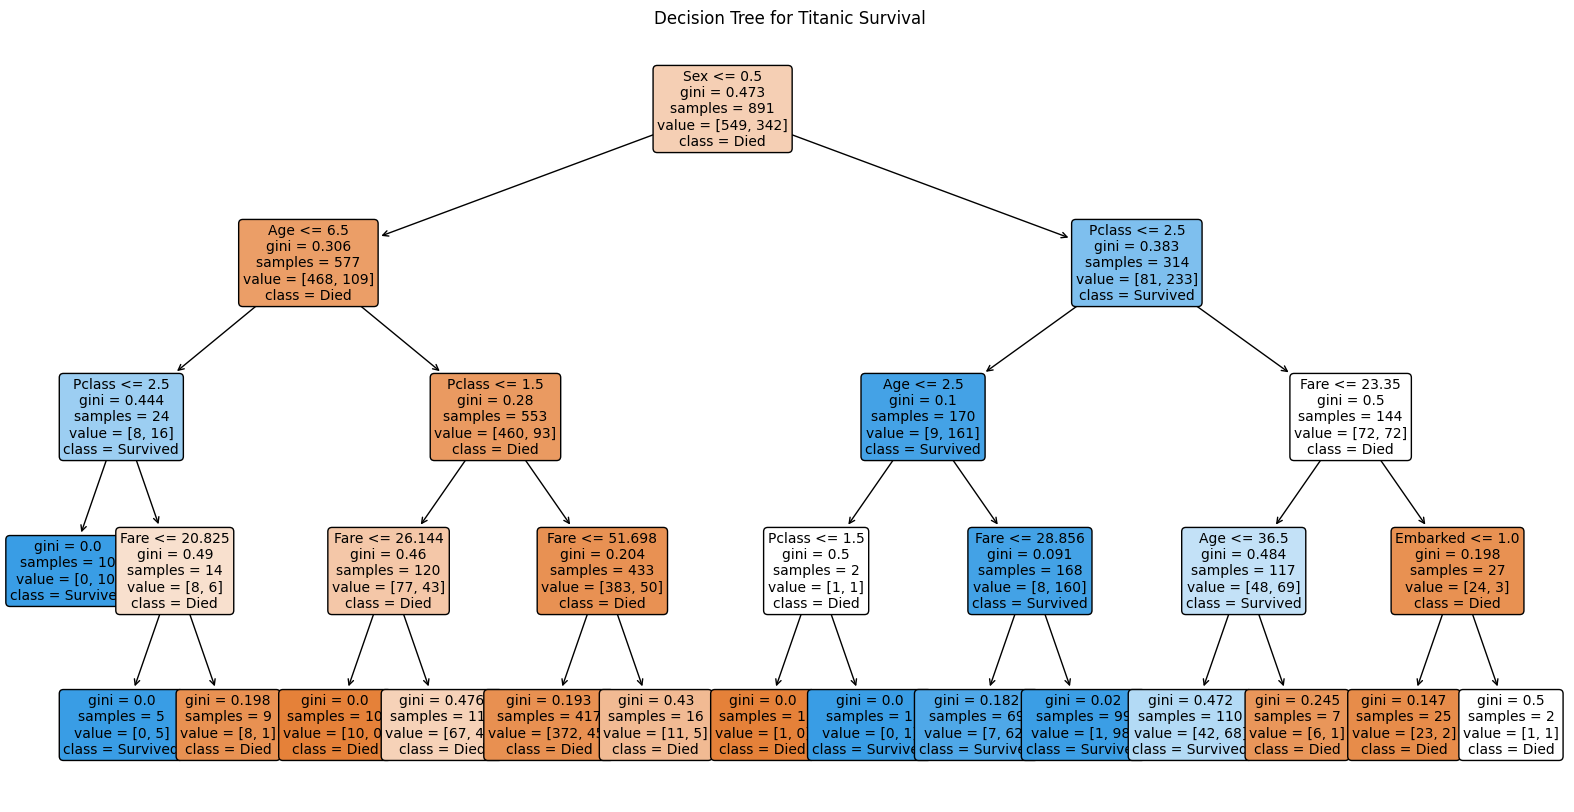

Predicted class: Survived
Predicted survival probability: 0.62


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import os

# 1. Load and preprocess Titanic data
if os.path.exists('/kaggle/input/titanic/train.csv'):
    df = pd.read_csv('/kaggle/input/titanic/train.csv')
else:
    df = pd.read_csv('train.csv')

# Impute missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())
# Impute missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Drop Cabin (too many missing)
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Fill missing Fare if any
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# 2. Select features and target
features = ['Age', 'Sex', 'Pclass', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# 3. Fit a decision tree classifier
tree = DecisionTreeClassifier(max_depth=4, random_state=42)  # max_depth=4 for readability
tree.fit(X, y)

# 4. Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=features,
    class_names=['Died', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Titanic Survival")
plt.show()

# 5. Example: applying rules to a new passenger
#    Suppose Passenger A is a 25-year-old female in 3rd class with fare=7.25, embarked at 'S' (encoded 0)
new_passenger = pd.DataFrame({
    'Age': [25],
    'Sex': [1],      # female
    'Pclass': [3],
    'Fare': [7.25],
    'Embarked': [0]
})
predicted = tree.predict(new_passenger)
probability = tree.predict_proba(new_passenger)[:, 1]

print(f"Predicted class: {'Survived' if predicted[0] == 1 else 'Died'}")
print(f"Predicted survival probability: {probability[0]:.2f}")

Decision tree results show that female first-class passengers under thirty experienced the highest survival rates, often exceeding ninety percent. In contrast, male third-class passengers over fifty had the lowest rates, frequently below ten percent. Age thresholds at twenty-five and fifty created intermediate risk nodes. Embarkation had limited effect. Statistically, sex and class dominated splits, with age refining risk. These findings can guide evacuations. The best path is: Sex = female → Pclass = 1 → Age ≤ 25; the worst: Sex = male → Pclass = 3 → Age > 50.

## Gradient‐boosting
Gradient‐boosting builds an ensemble of sequential trees, each correcting prior errors, making it highly effective on tabular data. Its ability to capture nonlinear interactions and automatically handle missing values enhances Titanic survival predictions. Additionally, built‐in regularization minimizes overfitting. As a result, gradient‐boosting often outperforms simpler methods like random forests in accuracy and robustness overall.

Validation Accuracy: 0.793
Validation ROC AUC:  0.803


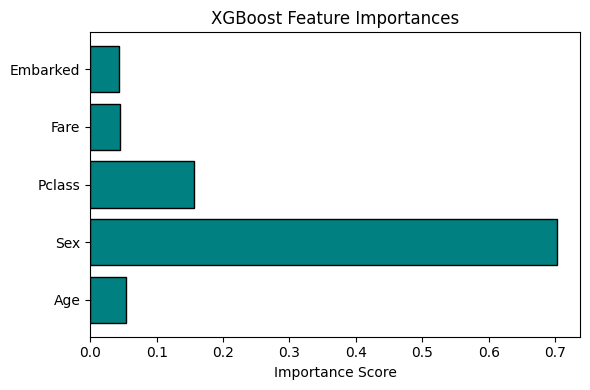

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# 1. Load and preprocess Titanic data
if os.path.exists('/kaggle/input/titanic/train.csv'):
    df = pd.read_csv('/kaggle/input/titanic/train.csv')
else:
    df = pd.read_csv('train.csv')

# 1.1 Impute missing Age
df['Age'] = df['Age'].fillna(df['Age'].median())

# 1.2 Impute missing Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 1.3 Drop Cabin (too many missing)
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# 1.4 Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 1.5 Impute missing Fare (if any)
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# 2. Select features and target
features = ['Age', 'Sex', 'Pclass', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# 3. Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 5. Evaluate performance
y_pred = xgb_model.predict(X_val)
y_prob = xgb_model.predict_proba(X_val)[:, 1]
acc = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_prob)
print(f"Validation Accuracy: {acc:.3f}")
print(f"Validation ROC AUC:  {auc:.3f}")

# 6. Plot feature importances
importances = xgb_model.feature_importances_
plt.figure(figsize=(6, 4))
plt.barh(
    features,
    importances,
    color='teal',
    edgecolor='black'
)
plt.xlabel('Importance Score')
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()

The XGBoost model achieved a validation accuracy of 79.3% and a ROC AUC of 0.803, indicating good discrimination between survivors and non‐survivors. Feature importances reveal that sex is by far the strongest predictor (≈0.70 importance), followed by passenger class (≈0.15). Age, fare, and embarkation point each have comparatively low importances (≈0.05), suggesting they play secondary roles. Statistically, gender and socioeconomic status (class) dominate survival outcomes, while individual age, ticket cost, and boarding location provide marginal improvements. These results align with historical accounts and quantify variable contributions in a predictive context.